<div style="direction:rtl"> به نام خدا </div>
<div style="direction:rtl"> نام : علیرضا آقایی </div>
<div style="direction:rtl"> شماره دانشجویی : 810197679</div>
<div style="direction:rtl"> گزارش کار تمرین کامپیوتری ۳ </div>
<br><br>
<div style="direction:rtl"> هدف پروژه: تجزیه و تحلیل داده‌ها با استفاده از Naive Bayes Classifier </div>
<br>
<div style="direction:rtl"> مقدار دهی اولیه به متغیر ها: </div>

In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
from hazm import *
import pandas as pd
from math import log
import math

PUNCS = ['،' , '؟' , '.' , '!' , ':' , '؛' , '"' , '\'' , ')' , '(' , '«' , '»' , '-' , '_' , '+' , '=' , 
         '/' , '\\' , '*' , '&' , '^' , '%' , '$' , '#' , '@' , '`' , '~' , ',' , '[' , ']']
NUMS = ['۰' , '۱' , '۲' , '۳' , '۴' , '۵' , '۶' , '۷' , '۸' , '۹' , '0' , '1' , '2' , '3' , '4' , '5' , '6' , 
        '7' , '8' , '9']
CATEGORIES = []

EMPTY_STR = ''

COUNTER_MODE = 1

NORMAL_MODE = 0
ADDITIVE_MODE = 0.2

TRAIN_DATA_FILE_PATH = 'books_train.csv'
TEST_DATA_FILE_PATH = 'books_test.csv'
STOP_WORDS_FILE_PATH = 'stopwords.dat'

<div style="direction:rtl"> <b> فاز اول: پیش پردازش داده </b> </div>
<br><br>
<div style="direction:rtl"> - خواندن فایل های داده شده و ذخیره سازی آن‌ها به صورت DataFrame: </div>

In [2]:
def delete_numbers_from_string(x):
    result = EMPTY_STR
    for c in x:
        if c not in NUMS:
            result += c
    return result

def initial_stop_words(stop_words):
    with open(STOP_WORDS_FILE_PATH , 'r') as file:
        for word in file:
            stop_words.append(word.rstrip())
    stop_words.append('')
            
def identify_tokens(row , stem , col_name , stop_w):
    column = row[col_name]
    no_number_column = delete_numbers_from_string(column)
    token_column = word_tokenize(no_number_column)
    final_token = [t.rstrip() for t in token_column if ((t.rstrip() not in PUNCS) and (t.rstrip() not in stop_w))]
    
    return final_token
            

train_data = pd.read_csv(TRAIN_DATA_FILE_PATH)
test_data = pd.read_csv(TEST_DATA_FILE_PATH)

<div style="direction:rtl"> - حذف کلمات پرتکرار و کاراکتر های بی اهمیت به همراه puntuation ها و در نهایت tokenize کردن جملات به کلمه‌های آن: </div>

In [3]:
stop_words = []
initial_stop_words(stop_words)
stemmer = Stemmer()

train_data['title'] = train_data.apply(identify_tokens, axis = 1 , stem = stemmer ,
                                       col_name = 'title' , stop_w = stop_words)
train_data['description'] = train_data.apply(identify_tokens, axis = 1 ,  stem = stemmer, 
                                       col_name = 'description' , stop_w = stop_words)

test_data['title'] = test_data.apply(identify_tokens, axis = 1 , stem = stemmer , 
                                       col_name = 'title' , stop_w = stop_words)
test_data['description'] = test_data.apply(identify_tokens, axis = 1 , stem = stemmer ,
                                       col_name = 'description' , stop_w = stop_words)

<div style="direction:rtl"> - در ادامه خروجی فاز پیش پردازش روی داده های train و test را می‌بینیم: </div>

In [4]:
train_data

,title,description,categories
0,"[ساختار, نظریه‌های, جامعه‌شناسی, ایران]","[ساختار, نظریه‌های, جامعه‌شناسی, ایران, ابوالف...",جامعه‌شناسی
1,"[جامعه, فرهنگ, کانادا]","[جامعه, فرهنگ, کانادا, مجموعه, کتاب‌های, جامعه...",جامعه‌شناسی
2,"[پرسش, موعود]","[پرسش‌های, مختلفی, درباره, شخصیت, امام, مهدی, ...",کلیات اسلام
3,"[موج, دریا]","[موج, دریا, قلم, مهری, ماهوتی, تصویرگری, عاطفه...",داستان کودک و نوجوانان
4,"[پرسش, غرب]","[پرسش, غرب, قلم, دکتر, اسماعیل, شفیعی, سروستان...",جامعه‌شناسی
...,...,...,...
2545,"[قضاوت‌‏های, امیرمؤمنان, حضرت, علی, علیه‏‌السلام]","[آنچه, عنوان, قضاوت‌های, امیرمؤمنان, حضرت, علی...",کلیات اسلام
2546,"[کراماتی, مهدی, موعود, عج]","[زینب, محمودی, پژوهشگر, دینی, بخشی, پیشگفتار, ...",کلیات اسلام
2547,"[انتقام, انتقام, انتقام]","[انتقام, انتقام, انتقام, داستان‌گونه‌ای, زبان,...",داستان کوتاه
2548,"[مرد, می‌آید]","[مرد, می‌آید, قلم, سیده‌فاطمه, موسوی, تصویرگری...",داستان کودک و نوجوانان


In [5]:
test_data

,title,description,categories
0,[کآشوب],"[کآشوب, بیست, سه, روایت, روضه‌هایی, می‌کنیم, ه...",داستان کوتاه
1,"[داستان‌های, برق‌آسا]","[داستان‌های, برق‌آسا, مجموعه, داستان‌هایی, گرد...",داستان کوتاه
2,"[بحثی, درباره, مرجعیت, روحانیت]","[مجموعه, مقالات, بحثی, درباره, مرجعیت, روحانیت...",کلیات اسلام
3,"[قلعه‌ی, حیوانات]","[قلعه‌ی, حیوانات, جورج, اورول, درباره, گروهی, ...",رمان
4,"[قصه, مثل]","[قصه, مثل, مجموعه, جلدی, محمد, میرکیانی, مجموع...",داستان کودک و نوجوانان
...,...,...,...
445,"[سیره, اقتصادی, امام, علی, ع]","[سیرۀ, اقتصادی, امام, علی, ع, سید, رضا, حسینی,...",کلیات اسلام
446,"[تفنگ, پدر, بام‌های, تهران]","[بام, رفته_بودیم, بامی, رسیده_بودیم, همانجا, خ...",رمان
447,[اصالت],"[اصالت, داریوش, قاسمیان, دستجردی, معاصر, فرد, ...",جامعه‌شناسی
448,"[تأمین, مالی, آموزش, پرورش, ایران]","[تأمین, مالی, آموزش, پرورش, عمومی, فرآیندی, وس...",جامعه‌شناسی


<div style="direction:rtl"> سوال ۱) </div>
<div style="direction:rtl"> هدف هر دو روش این است که کلمات را به فرم پایه خود یا همان ریشه تبدیل کنند ولی در روش stemming این کار معمولا با استفاده از حذف پیشوند ها و پسوند ها انجام می‌شود و معمولا به قواعد زبان و کلمات آن توجهی ندارد ولی در روش lemmatization تبدیل کردن به ریشه با توجه به قواعد و کلمات آن زبان انجام می‌شود. </div>

<div style="direction:rtl"> <b> فاز دوم: فرآیند مساله </b> </div>

<div style="direction:rtl"> سوال ۲) </div>
<br>
<div style="direction:rtl"> posterior به معنای احتمال تعلق یک کتاب به یک کلاس به شرط داشتن تعدادی از کلمات است که با توجه به فرمول داده شده محاسبه می‌شود. </div>
<div style="direction:rtl"> prior به معنای این است که هر کتاب به چه احتمالی متعلق به یک کلاس است. با بررسی dataset و به دست آوردن تعداد کتاب های هر کلاس، به دست می‌آید. </div>
<div style="direction:rtl"> liklihood به معنای احتمال داشتن تعدادی از کلمات به شرط این که کتاب متعلق به یک کلاس باشد است. با بررسی dataset و به دست آوردن تعداد کلمات به ازای هر کلاس محاسبه می‌شود. </div>
<div style="direction:rtl"> evidence به معنای احتمال داشتن تعدادی از کلمات به طور کلی است و با به دست آوردن prior و liklihood می‌توانیم آن را محاسبه کنیم.(با جمع حاصل ضرب های liklihood و prior متناظر با هم) </div>


<br>
<div style="direction:rtl"> ادغام دو ستون نام و توضیحات در داده ها: </div>

In [6]:
train_data['book_info'] = train_data['title'] + train_data['description']
train_data.drop(columns = ['title' , 'description'], inplace = True)

test_data['book_info'] = test_data['title'] + test_data['description']
test_data.drop(columns = ['title' , 'description'], inplace = True)

In [7]:
train_data

,categories,book_info
0,جامعه‌شناسی,"[ساختار, نظریه‌های, جامعه‌شناسی, ایران, ساختار..."
1,جامعه‌شناسی,"[جامعه, فرهنگ, کانادا, جامعه, فرهنگ, کانادا, م..."
2,کلیات اسلام,"[پرسش, موعود, پرسش‌های, مختلفی, درباره, شخصیت,..."
3,داستان کودک و نوجوانان,"[موج, دریا, موج, دریا, قلم, مهری, ماهوتی, تصوی..."
4,جامعه‌شناسی,"[پرسش, غرب, پرسش, غرب, قلم, دکتر, اسماعیل, شفی..."
...,...,...
2545,کلیات اسلام,"[قضاوت‌‏های, امیرمؤمنان, حضرت, علی, علیه‏‌السل..."
2546,کلیات اسلام,"[کراماتی, مهدی, موعود, عج, زینب, محمودی, پژوهش..."
2547,داستان کوتاه,"[انتقام, انتقام, انتقام, انتقام, انتقام, انتقا..."
2548,داستان کودک و نوجوانان,"[مرد, می‌آید, مرد, می‌آید, قلم, سیده‌فاطمه, مو..."


In [8]:
test_data

,categories,book_info
0,داستان کوتاه,"[کآشوب, کآشوب, بیست, سه, روایت, روضه‌هایی, می‌..."
1,داستان کوتاه,"[داستان‌های, برق‌آسا, داستان‌های, برق‌آسا, مجم..."
2,کلیات اسلام,"[بحثی, درباره, مرجعیت, روحانیت, مجموعه, مقالات..."
3,رمان,"[قلعه‌ی, حیوانات, قلعه‌ی, حیوانات, جورج, اورول..."
4,داستان کودک و نوجوانان,"[قصه, مثل, قصه, مثل, مجموعه, جلدی, محمد, میرکی..."
...,...,...
445,کلیات اسلام,"[سیره, اقتصادی, امام, علی, ع, سیرۀ, اقتصادی, ا..."
446,رمان,"[تفنگ, پدر, بام‌های, تهران, بام, رفته_بودیم, ب..."
447,جامعه‌شناسی,"[اصالت, اصالت, داریوش, قاسمیان, دستجردی, معاصر..."
448,جامعه‌شناسی,"[تأمین, مالی, آموزش, پرورش, ایران, تأمین, مالی..."


<div style="direction:rtl"> در این قسمت با استفاده از کلاس Utilities مقادیر مورد نیاز را از روی train_data به دست می‌آوریم( مانند تعداد سطرها، تعداد کل کلمه ها در هر category، تعداد کتاب از هر category، تعداد هر کلمه در یک category) </div>
<br>
<div style="direction:rtl"> سپس با استفاده از utility های به دست آمده و کلاس Probablities ، احتمال های prior و liklihood را به دست می‌آوریم. </div>

In [9]:
def dictionary_cnt_handler(element , dic , add_value):
    if element not in dic.keys():
        dic[element] = add_value
    else:
        dic[element] = dic[element] + add_value

def sortSecond(value):
    return value[1]
        
class Utilities:
    def __init__(self):
        self.category_unique_word = {}
        self.feature_cnt_per_category = {}
        self.category_word_cnt = {}
        self.category_sample_cnt = {}
        self.category_mow = {}
        self.total_samp = 0
    
    def mow_handler(self , word , category):
        cnt = 0
        if (word , category) in self.feature_cnt_per_category.keys():
            cnt = self.feature_cnt_per_category[(word , category)]
        
        for i in range(len(self.category_mow[category])):
            if self.category_mow[category][i][0] == word:
                self.category_mow[category].pop(i)
                return
                
        
        if len(self.category_mow[category]) < 5:
            self.category_mow[category].append((word , cnt))
        else:
            self.category_mow[category].append((word , cnt))
            self.category_mow[category].sort(key = sortSecond , reverse = True)
            self.category_mow[category].pop()
        
    def calculate_utilities(self , data_frame):
        cur_ind = 0
        self.total_samp = len(data_frame)
        for row_index, row in data_frame.iterrows():
            word_list = row['book_info']
            category = row['categories']

            if category not in CATEGORIES:
                CATEGORIES.append(category)
                self.category_unique_word[category] = 0
                self.category_mow[category] = [] 

            dictionary_cnt_handler(category , self.category_sample_cnt , COUNTER_MODE)
            dictionary_cnt_handler(category , self.category_word_cnt , len(word_list))
            for word in word_list:
                if (word , category) not in self.feature_cnt_per_category.keys():
                    self.category_unique_word[category] = self.category_unique_word[category] + 1
                dictionary_cnt_handler((word , category) , self.feature_cnt_per_category , COUNTER_MODE)
                self.mow_handler(word , category)
                
class Probablities:
    def __init__(self , alpha):
        self.prior = {}
        self.liklihood = {}
        self.alpha = alpha
        
    def calculate_probs(self , train_utilities):
        self.calculate_prior_prob(train_utilities)
        self.calculate_liklihood_prob(train_utilities)

    def calculate_prior_prob(self , train_utilities):
        total_cnt = 0
        for category in CATEGORIES:
            if category not in train_utilities.category_sample_cnt:
                self.prior[category] = 0
            else:
                self.prior[category] = train_utilities.category_sample_cnt[category] / train_utilities.total_samp

    def calculate_liklihood_prob(self , train_utilities):
        for (feature , category) in train_utilities.feature_cnt_per_category.keys():
            k = train_utilities.category_unique_word[category]
            occurence_cnt = train_utilities.feature_cnt_per_category[(feature , category)]
            category_total_word = train_utilities.category_word_cnt[category]
            self.liklihood[(feature , category)] = (occurence_cnt + self.alpha) / (category_total_word + k * self.alpha)
            
    def calculate_class_probablity(self , train_utilities , evidence , category):
        prob = log(self.prior[category])
        for word in evidence:
            if (word , category) not in self.liklihood.keys():
                k = train_utilities.category_unique_word[category]
                category_total_word = train_utilities.category_word_cnt[category]
                new_word_prob = (self.alpha) / (category_total_word + k * self.alpha)
                if new_word_prob == 0:
                    return 0
                prob += log(new_word_prob)
            else:
                prob += log(self.liklihood[(word , category)])
        return prob
            
    def calculate_class(self , row , train_utilities):
        evidence = row['book_info']
        max_prob = -math.inf
        calc_class = '-'
        for category in CATEGORIES:
            cur_prob = self.calculate_class_probablity(train_utilities , evidence , category)
            if cur_prob > max_prob and cur_prob != 0:
                max_prob = cur_prob
                calc_class = category
        return calc_class

train_utilities = Utilities()
train_utilities.calculate_utilities(train_data)

train_probablities = Probablities(NORMAL_MODE)
train_probablities.calculate_probs(train_utilities)

additive_train_probablities = Probablities(ADDITIVE_MODE)
additive_train_probablities.calculate_probs(train_utilities)

<div style="direction:rtl"> <b> Bigrams </b></div>
<br>
<div style="direction:rtl"> سوال ۳) </div>
<div style="direction:rtl"> جمله‌ی ۱: شرکت کویر موتور در حوزه‌ی صنعت فعال است. </div>
<div style="direction:rtl"> جمله دوم: یکی از مکان های دیدنی استان اصفهان، کویر مصر است. </div>
<div style="direction:rtl"> bigram به این صورت به ما در این مثال کمک می‌کند که با داشتن کلمه‌ای که بعد از کلمه‌ی کویر آمده است، می‌توانیم معنای متفاوت آن را در دو جمله متوجه شویم و بین آن‌ها تفاوت قایل شویم. </div>
<br>
<div style="direction:rtl"> در این مثال بله، bigram برای دانستن معنای کلمه کویر کافی است. </div>


<div style="direction:rtl"> <b> Additive Smoothing </b></div>
<br>

<div style="direction:rtl"> سوال ۴) </div>
<div style="direction:rtl"> با توجه به این که در صورتی که اگر یک کلمه در یک category نیامده باشد، احتمال liklihood آن کلمه به ازای آن category برابر با صفر می‌شود(احتمال آن کلمه به شرط این که کتاب در آن category باشد)، و از طرفی احتمال posterior (احتمال این که کتاب در یک category باشد به شرط دیدن تعدادی از کلمات) در محاسباتش حاصل ضرب احتمالات liklihood وجود دارد، به همین دلیل اگر یک کلمه در یک category در زمان train نیامده باشد، مقدار صفر احتمال liklihood آن به ازای آن category باعث می‌شود احتمال posterior هم صفر شود. </div>




<div style="direction:rtl"> همین صفر شدن احتمال posterior باعث پیش بینی های به قطعی می‌شود که الزما درست نیست. </div>
<br>
<div style="direction:rtl"> سوال ۵) </div>
<div style="direction:rtl"> Additive Smoothing با اضافه کردن یک مقدار آلفا به صورت و یک k * alpha به مخرج کسر احتمال liklihood از صفر شدن احتمال به ازای کلماتی که در یک category نیستند جلوگیری می‌کند و باعث رفع خطای حاصل از آن می‌شود.(در مورد مشکل وجود احتمال صفر در قسمت قبل توضیح داده شد.) در این روش احتمال liklihood به این صورت محاسبه می‌شود: </div>

P(w | c) = ((#occurrence of w when C = c) + alpha) / ((#words when C = c) + k * alpha)

---> alpha : smoothing parameter
<br>
---> k : number of dimensions of category
<br>
<div style="direction:rtl"> این روش با اضافه کردن پارامتر alpha به کلاس Probablities و استفاده از آن برای به دست آوردن احتمال liklihood، پیاده سازی شده است. </div>

<div style="direction:rtl"> <b> بررسی صحت </b> </div>
<br>
<div style="direction:rtl"> سوال ۶) </div>
<div style="direction:rtl"> نمودار پرتکرار ترین کلمات به ازای هر ۶ نوع مختلف کتاب: </div>

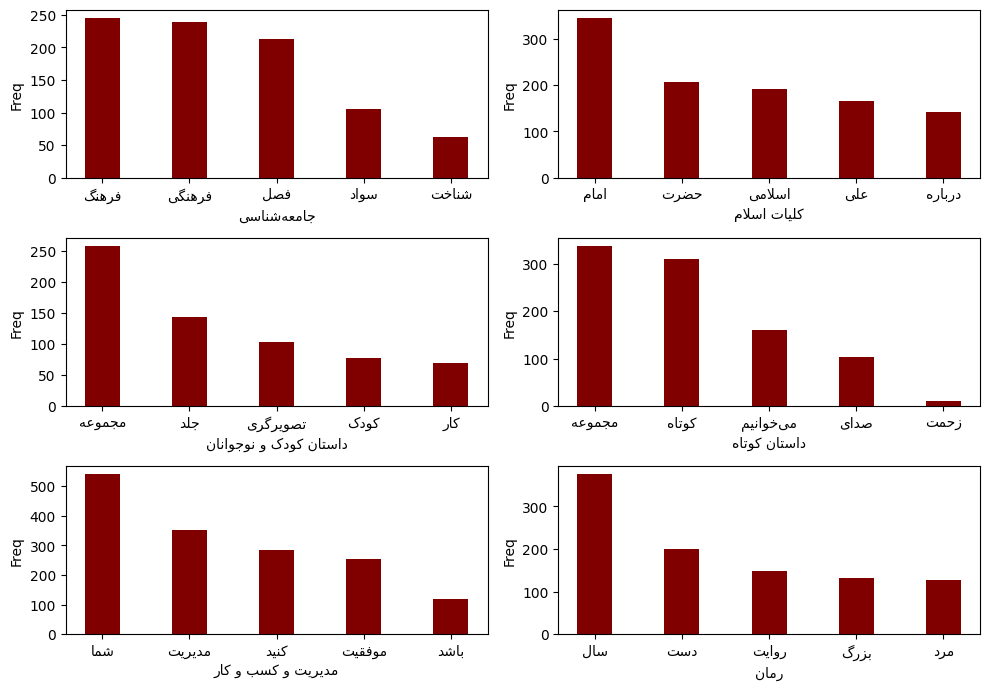

In [10]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

fig = plt.figure(num=None, figsize=(10, 7), dpi=100, facecolor='w', edgecolor='k')
for i in range(len(CATEGORIES)):
    c = CATEGORIES[i]
    plt.subplot(3 , 2 , i + 1)
    plt.xlabel(get_display(arabic_reshaper.reshape(c)))
    plt.ylabel('Freq')
    words = []
    freqs = []
    for (word , cnt) in train_utilities.category_mow[c]:
        words.append(get_display(arabic_reshaper.reshape(word)))
        freqs.append(cnt)
    plt.bar(words, freqs, color ='maroon', width = 0.4)
plt.tight_layout()
plt.show()

<div style="direction:rtl"> <b> فاز سوم: ارزیابی </b> </div>

<div style="direction:rtl"> سوال ۷) </div>
<div style="direction:rtl"> با توجه به بالانس نبودن dataset ها در بیشتر مواقع، نیاز است تا بسته به وضعیت dataset خود، از معیار های متفاوتی استفاده کنیم و ممکن است یک معیار به خوبی عملکرد مدل ما را بررسی نکند. </div>
<div style="direction:rtl"> برای مثال مدلی را در نظر می‌گیریم که قرار است تشخیص دهد یک ایمیل اسپم است یا نه  </div>
<div style="direction:rtl"> حالت ۱: ممکن است این مدل تعداد کمی از ایمیل های اسپم را تشخیص دهد ولی همه آن‌ها را درست اسپم تشخیص دهد. در این صورت مقدار Precision بالا خواهد بود ولی مقدار Recall پایین خواهد بود که نشان می‌دهد مدل ما بهینه نیست. </div>
<div style="direction:rtl"> حالت ۲: ممکن است این مدل تعداد زیادی از ایمیل های اسپم را درست تشخیص دهد ولی تعدادی از ایمیل های سالم هم اسپم تشخیص دهد. در این صورت مقدار Recall بالا خواهد بود ولی مقدار Precision کم است که باز هم نشان می‌دهد مدل ما بهینه نیست. </div>
<div style="direction:rtl"> همان طور که از مثال بالا هم مشخص است، با داشتن تنها یکی از این معیارها نمی‌توان نشخیص داد که آیا مدل ما درست کار می‌کند یا خیر. </div>

<br>
<div style="direction:rtl"> سوال ۸) </div>
<div style="direction:rtl"> معیار F1 میانگین harmonic از مقدار های Precision و Recall است. فرمول دقیق آن در ادامه آمده است: </div>

<center><div lang="latex">
$F1 = (\frac{(Recall)^{-1} + (Precision)^{-1}}{2}) ^ {-1} = 2 \times (\frac{Precision \times Recall}{Precision + Recall})$
</div></center>

<div style="direction:rtl"> دلیل این که از میانگین harmonic استفاده شده است آن است که معیار F1 اگر هر کدام از معیار های Precision یا Recall مقدار کمی داشتند، مدل را جریمه کند (مقدار F1 برای مدل به شدت کاهش یابد) </div>
<div style="direction:rtl"> با توجه که در مدل ما هم معیار Precision و Recall برای ارزیابی مهم است، بنابراین به معیار F1 نیاز داریم تا این دو معیار را بررسی کند. </div>

<div style="direction:rtl"> سوال ۹) </div>
<div style="direction:rtl"> میانگین گیری macro: در این روش به صورت arithmetic میانگین می‌گیریم که همان جمع عناصر تقسیم بر تعداد است. </div>
<div style="direction:rtl"> میانگین گیری micro: در این روش تمام sample هایی که درست تشخیص داده شده‌اند را به عنوان True Positive در نظر می‌گیریم. در واقع تمام کلاس ها را یکی در نظر می‌گیریم و سپس مقدار پارامتر ها را به دست می‌آوریم.  </div>
<div style="direction:rtl"> میانگین گیری weighted: در این روش برای هر کلاس یک وزن در نظر می‌گیریم که برابر با تعداد sample های آن کلاس است و سپس میانگین وزن دار می‌گیریم. </div>

<div style="direction:rtl"> حال مدل خود را (هم حالت عادی و هم با Additive Smoothing) روی داده های تست اعمال می‌کنیم. </div>
<div style="direction:rtl"> نتایج به دست آمده را در دو ستون Normal_Mode و Additive_Mode ذخیره می‌کنیم </div>

In [11]:
test_data['Normal_Mode'] = test_data.apply(train_probablities.calculate_class , axis = 1 ,
                                               train_utilities = train_utilities)
test_data['Additive_Mode'] = test_data.apply(additive_train_probablities.calculate_class , axis = 1 ,
                                               train_utilities = train_utilities)

<div style="font-size:20px;color:red;direction:rtl"> جدول به دست آمده به این شکل می‌شود: </div>

In [12]:
test_data

,categories,book_info,Normal_Mode,Additive_Mode
0,داستان کوتاه,"[کآشوب, کآشوب, بیست, سه, روایت, روضه‌هایی, می‌...",-,رمان
1,داستان کوتاه,"[داستان‌های, برق‌آسا, داستان‌های, برق‌آسا, مجم...",-,داستان کوتاه
2,کلیات اسلام,"[بحثی, درباره, مرجعیت, روحانیت, مجموعه, مقالات...",-,کلیات اسلام
3,رمان,"[قلعه‌ی, حیوانات, قلعه‌ی, حیوانات, جورج, اورول...",-,جامعه‌شناسی
4,داستان کودک و نوجوانان,"[قصه, مثل, قصه, مثل, مجموعه, جلدی, محمد, میرکی...",داستان کودک و نوجوانان,داستان کودک و نوجوانان
...,...,...,...,...
445,کلیات اسلام,"[سیره, اقتصادی, امام, علی, ع, سیرۀ, اقتصادی, ا...",-,کلیات اسلام
446,رمان,"[تفنگ, پدر, بام‌های, تهران, بام, رفته_بودیم, ب...",-,داستان کودک و نوجوانان
447,جامعه‌شناسی,"[اصالت, اصالت, داریوش, قاسمیان, دستجردی, معاصر...",-,جامعه‌شناسی
448,جامعه‌شناسی,"[تأمین, مالی, آموزش, پرورش, ایران, تأمین, مالی...",-,جامعه‌شناسی


<div style="direction:rtl"> <b> سوال ۱۰) </b></div>
<div style="direction:rtl"> حال به ازای هر دو حالت a و b گفته شده در سوال، معیار های خواسته شده را به دست می‌آوریم: </div>

In [13]:
def set_class_scores(c , single_class_result, normal_all_detected_class, additive_all_detected_class , 
                     normal_correct_detected_class , additive_correct_detected_class , total_class):
    normal_precision = normal_correct_detected_class / normal_all_detected_class
    normal_recall = normal_correct_detected_class / total_class
    if normal_precision + normal_recall == 0:
        normal_f1 = 0
    else:
        normal_f1 = 2 * (normal_precision * normal_recall) / (normal_precision + normal_recall)
    
    additive_precision = additive_correct_detected_class / additive_all_detected_class
    additive_recall = additive_correct_detected_class / total_class
    additive_f1 = 2 * (additive_precision * additive_recall) / (additive_precision + additive_recall)
    
    single_class_result['Precision/' + c] = [normal_precision * 100 , additive_precision * 100]
    single_class_result['Recall/' + c] = [normal_recall * 100 , additive_recall * 100]
    single_class_result['F1/' + c] = [normal_f1 * 100 , additive_f1 * 100]


single_class_result = {'Model' : ['Normal' , 'Additive'] , 'Accuracy' : []}


normal_accuracy = len(test_data[test_data.Normal_Mode == test_data.categories]) / len(test_data)
additive_accuracy = len(test_data[test_data.Additive_Mode == test_data.categories]) / len(test_data)

single_class_result['Accuracy'].append(normal_accuracy * 100)
single_class_result['Accuracy'].append(additive_accuracy * 100)

for c in CATEGORIES:
    normal_all_detected_class = len(test_data[(test_data.Normal_Mode == c)])
    additive_all_detected_class = len(test_data[(test_data.Additive_Mode == c)])
    normal_correct_detected_class = len(test_data[(test_data.Normal_Mode == c) & (test_data.categories == c)])
    additive_correct_detected_class = len(test_data[(test_data.Additive_Mode == c) & (test_data.categories == c)])
    total_class = len(test_data[test_data.categories == c])
    
    set_class_scores(c , single_class_result, normal_all_detected_class, additive_all_detected_class , 
                     normal_correct_detected_class , additive_correct_detected_class , total_class)


<div style="font-size:20px;color:red;direction:rtl"> Accuracy به همراه معیار های گفته شده به ازای هر کلاس: (به ازای حالت Normal و Additive) </div>

In [14]:
single_class_result = pd.DataFrame(single_class_result)
single_class_result

,Model,Accuracy,Precision/جامعه‌شناسی,Recall/جامعه‌شناسی,F1/جامعه‌شناسی,Precision/کلیات اسلام,Recall/کلیات اسلام,F1/کلیات اسلام,Precision/داستان کودک و نوجوانان,Recall/داستان کودک و نوجوانان,F1/داستان کودک و نوجوانان,Precision/داستان کوتاه,Recall/داستان کوتاه,F1/داستان کوتاه,Precision/مدیریت و کسب و کار,Recall/مدیریت و کسب و کار,F1/مدیریت و کسب و کار,Precision/رمان,Recall/رمان,F1/رمان
0,Normal,6.666667,75.000000,4.000000,7.594937,100.00000,13.333333,23.529412,93.333333,18.666667,31.111111,100.00000,1.333333,2.631579,100.000000,2.666667,5.194805,0.000000,0.000000,0.000000
1,Additive,80.222222,79.268293,86.666667,82.802548,86.30137,84.000000,85.135135,75.862069,88.000000,81.481481,69.69697,61.333333,65.248227,92.207792,94.666667,93.421053,76.923077,66.666667,71.428571


In [15]:
def calculate_macro(single_class_result , all_class_result):
    precision_ind = []
    recall_ind = []
    f1_ind = []
    categories_cnt = len(CATEGORIES)
    
    for c in CATEGORIES:
        precision_ind.append('Precision/' + c)
        recall_ind.append('Recall/' + c)
        f1_ind.append('F1/' + c)
    all_class_result['Macro Precision'] = single_class_result[precision_ind].sum(1) / categories_cnt
    all_class_result['Macro Recall'] = single_class_result[recall_ind].sum(1) / categories_cnt
    all_class_result['Macro F1'] = single_class_result[f1_ind].sum(1) / categories_cnt

def calculate_micro(test_data , all_class_result):
    normal_correct_detected_class = len(test_data[test_data.Normal_Mode == test_data.categories])
    additive_correct_detected_class = len(test_data[test_data.Additive_Mode == test_data.categories])
    
    normal_precision = normal_correct_detected_class / len(test_data)
    additive_precision = additive_correct_detected_class / len(test_data)
    
    normal_recall = normal_correct_detected_class / len(test_data)
    additive_recall = additive_correct_detected_class / len(test_data)
    
    normal_f1 = 2 * (normal_precision * normal_recall) / (normal_precision + normal_recall)
    additive_f1 = 2 * (additive_precision * additive_recall) / (additive_precision + additive_recall)

    all_class_result['Micro Precision'] = [normal_precision , additive_precision]
    all_class_result['Micro Recall'] = [normal_recall , additive_recall]
    all_class_result['Micro F1'] = [normal_f1 , additive_f1]
    
def calculate_weighted(test_data , single_class_result , all_class_result):
    weighted_class = single_class_result.copy()
    precision_ind = []
    recall_ind = []
    f1_ind = []
    
    total_cnt = len(test_data)
    for c in CATEGORIES:
        category_cnt = len(test_data[test_data.categories == c])
        precision_ind.append('Precision/' + c)
        recall_ind.append('Recall/' + c)
        f1_ind.append('F1/' + c)
        
        weighted_class[['Precision/' + c , 'Recall/' + c , 'F1/' + c]] *= category_cnt
        
    all_class_result['Weighted Precision'] = weighted_class[precision_ind].sum(1) / total_cnt
    all_class_result['Weighted Recall'] = weighted_class[recall_ind].sum(1) / total_cnt
    all_class_result['Weighted F1'] = weighted_class[f1_ind].sum(1) / total_cnt
        
    
all_class_result = {'Model' : ['Normal' , 'Additive']}

calculate_macro(single_class_result , all_class_result)
calculate_micro(test_data , all_class_result)
calculate_weighted(test_data , single_class_result , all_class_result)

<div style="font-size:20px;color:red;direction:rtl"> معیار های Macro، Micro و Weighted برای هر دو حالت Normal و Additive: </div>

In [16]:
all_class_result = pd.DataFrame(all_class_result)
all_class_result

,Model,Macro Precision,Macro Recall,Macro F1,Micro Precision,Micro Recall,Micro F1,Weighted Precision,Weighted Recall,Weighted F1
0,Normal,78.055556,6.666667,11.676974,0.066667,0.066667,0.066667,78.055556,6.666667,11.676974
1,Additive,80.043262,80.222222,79.919503,0.802222,0.802222,0.802222,80.043262,80.222222,79.919503


<div style="direction:rtl"> سوال ۱۱) </div>
<div style="direction:rtl"> با توجه به نتایج به دست آمده به حالت Additive Smoothing بسیار بهتر از حالت Normal عمل می‌کند و که این موضوع از روی تفاوت مقدار معیار های Accuracy و F1 بین دو حالت مشخص است. </div>
<div style="direction:rtl"> در مورد خود روش Additive Smoothing دو کلاس مدیریت کسب و کار و کلیات اسلام دارای بیشترین مقدار F1 هستند که با توجه به این که در این نوع کتاب ها برخی کلمات خاص وجود دارد که در سایر انواع دیگر نیست، این انتظار می‌رفت که مدل ما این دو کلاس را بهتر از سایر کلاس ها تشخیص دهد. </div>
<div style="direction:rtl"> کلاس های رمان و داستان کوتاه نیز دارای پایین ترین مقدار F1 هستند که با توجه به این که در این کلاس ها دایره لغات وسیع تر است و همچنین کلمات خاص کمتر است، نتایج قابل قبول است. </div>

<div style="direction:rtl"> با توجه به فرضی که در مورد naive bayse بودن مساله انجام دادیم، توانسته ایم به Accuracy ۸۲٪ برسیم که به نسبت فرضی که انجام داده‌ایم دقت خوبی است. </div>

<div style="direction:rtl"> سوال ۱۲) </div>

In [17]:
test_data[test_data.categories != test_data.Additive_Mode].head(5)

,categories,book_info,Normal_Mode,Additive_Mode
0,داستان کوتاه,"[کآشوب, کآشوب, بیست, سه, روایت, روضه‌هایی, می‌...",-,رمان
3,رمان,"[قلعه‌ی, حیوانات, قلعه‌ی, حیوانات, جورج, اورول...",-,جامعه‌شناسی
5,کلیات اسلام,"[اسلام, چالش, اقتصادی, اسلام, چالش, اقتصادی, م...",-,جامعه‌شناسی
12,داستان کوتاه,"[زندانی, قلعه‌ی, قهقهه, رمان, تاریخی, زندانی, ...",-,داستان کودک و نوجوانان
20,کلیات اسلام,"[فاطمه, علی, فاطمه, علی, علی, قهرمانی, کتابی, ...",-,داستان کودک و نوجوانان


<div style="direction:rtl"> یکی از دلایل، عدم در نظر گرفتن ارتباط بین کلمات است که ممکن است مدل ما را به اشتباه بیاندازد. برای مثال برای سطر پنجم که به جای کلیات اسلام، کتاب را در بخش داستان کودک و نوجوان تشخیض داده‌ایم، می‌تواند به همین دلیل باشد. زیرا ممکن است نام های علی و فاطمه که در کتاب مورد نظر ما منظور از آن‌ها حضرت علی و حضرت فاطمه بوده‌اند را به عنوان اسم دو شخص یا کودک در نظر گرفته باشد. </div>
<div style="direction:rtl"> همچنین با توجه به نزدیک بودن ۲ کلاس داستان کودک و نوجوان و داستان کوتاه به یک دیگر باید داده های train بیشتری داشته باشیم تا بتوانیم دقت تشخیص را بالاتر ببریم. که سطر ۴ به همین دلیل می‌تواند باشد. </div>
<div style="direction:rtl"> استفاده از روش bag of words و این که ترتیب آمدن کلمات در جمله برای مدل ما اهمیت ندارد نیز می‌تواند باعث به وجود آمدن خطا در مدل ما باشد. </div>